In [212]:
# loading insurance.csv
import pandas as pd

df = pd.read_csv('insurance.csv')

# printing first 5 rows of dataframe
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [213]:
# defining the prediction
# inputs: age, bmi, children

params = [0, 0, 0, 0]
pred = lambda age, bmi, children: params[0] + (params[1] * age) + (params[2] * bmi) + (params[3] * children)

print(pred(4, 10, 12)) # testing the prediction function



# let's also define a function for the sum of residuals
def sum_residuals(multipliers = [1 for i in range(len(df))]):
    sum_error = 0

    for i in range(len(df)):
        sum_error += (df['charges'][i] - pred(df['age'][i], df['bmi'][i], df['children'][i]))*multipliers[i]

    return sum_error

print(sum_residuals())

0
17755824.990759


In [214]:
# defining the loss function

def loss_function(n = len(df)):
    sum_squared = 0

    for i in range(n):
        residual = (df['charges'][i] - pred(float(df['age'][i]), float(df['bmi'][i]), float(df['children'][i])))**2
        sum_squared += residual
    
    return sum_squared

print(loss_function())

431701516861.6872


In [215]:
# defining hyper parameters
alpha = 0.00000002
epochs = 20

# defining the simulation function
def simulation():
    results = {
        'run_num': [0],
        'total_error': [loss_function()]
    }

    for i in range(epochs):
        # just go through each parameter and update them accordingly
        params[0] += 2 * alpha * sum_residuals()
        params[1] += 2 * alpha * sum_residuals(df['age'])
        params[2] += 2 * alpha * sum_residuals(df['bmi'])
        params[3] += 2 * alpha * sum_residuals(df['children'])

        # adding resulting run to table dataframe
        new_data = {
            'run_num': i + 1,
            'total_error': loss_function()
        }

        print(f'new_data = {new_data}')

        results['run_num'].append(new_data['run_num'])
        results['total_error'].append(new_data['total_error'])

    return results

In [216]:
# running the simulation and seeing how it goes

results = simulation()

print(params)

new_data = {'run_num': 1, 'total_error': 366486427137.28937}
new_data = {'run_num': 2, 'total_error': 317833226804.26575}
new_data = {'run_num': 3, 'total_error': 281536056736.24023}
new_data = {'run_num': 4, 'total_error': 254457097496.01233}
new_data = {'run_num': 5, 'total_error': 234255354628.09952}
new_data = {'run_num': 6, 'total_error': 219184314779.66815}
new_data = {'run_num': 7, 'total_error': 207940984039.97244}
new_data = {'run_num': 8, 'total_error': 199553260820.36142}
new_data = {'run_num': 9, 'total_error': 193295908832.21317}
new_data = {'run_num': 10, 'total_error': 188627867617.23563}
new_data = {'run_num': 11, 'total_error': 185145482286.44073}
new_data = {'run_num': 12, 'total_error': 182547610022.8133}
new_data = {'run_num': 13, 'total_error': 180609587415.6157}
new_data = {'run_num': 14, 'total_error': 179163808541.7495}
new_data = {'run_num': 15, 'total_error': 178085235083.10754}
new_data = {'run_num': 16, 'total_error': 177280586051.60696}
new_data = {'run_num

In [217]:
print(results)

{'run_num': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'total_error': [431701516861.6872, 366486427137.28937, 317833226804.26575, 281536056736.24023, 254457097496.01233, 234255354628.09952, 219184314779.66815, 207940984039.97244, 199553260820.36142, 193295908832.21317, 188627867617.23563, 185145482286.44073, 182547610022.8133, 180609587415.6157, 179163808541.7495, 178085235083.10754, 177280586051.60696, 176680272728.9471, 176232381703.60886, 175898185910.7769, 175648795651.84756]}


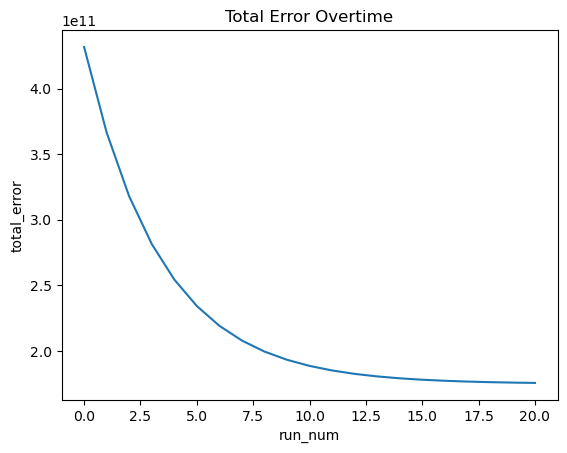

In [219]:
# plotting results
import matplotlib.pyplot as plt

plt.plot(results['run_num'], results['total_error'])
plt.xlabel('run_num')
plt.ylabel('total_error')
plt.title('Total Error Overtime')

plt.show()

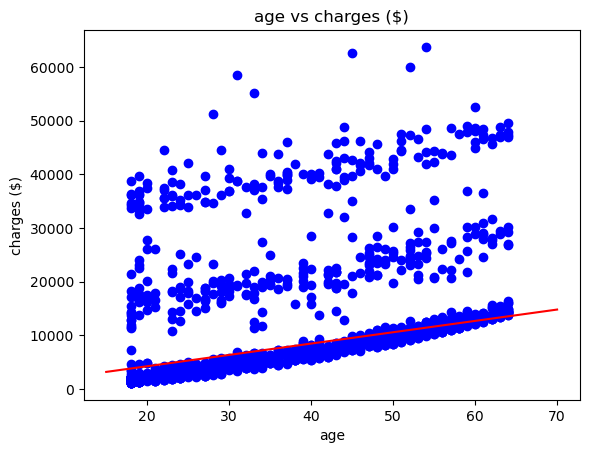

In [ ]:
# relationship between age & charges along with line of best fit

x_list = [x/100 for x in range(1500, 7000)]
age_predict = [params[0] + (x * params[1]) for x in x_list]

plt.scatter(df['age'], df['charges'], color='blue')
plt.plot(x_list, age_predict, color='red', label='age regression')
plt.xlabel('age')
plt.ylabel('charges ($)')
plt.title('age vs charges ($)')

plt.show()

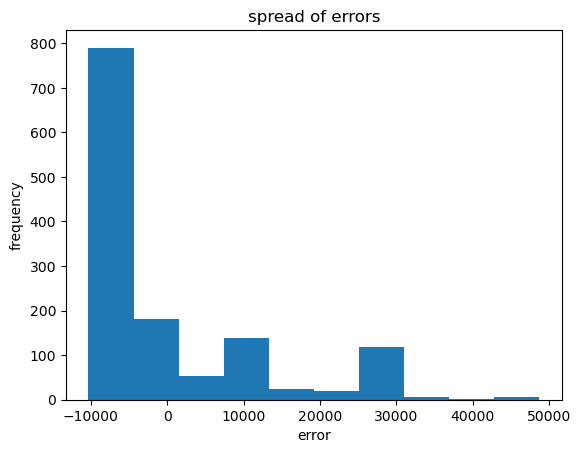

In [232]:
# plotting histogram or errors

errors = [df['charges'][i] - pred(df['age'][i], df['bmi'][i], df['children'][i]) for i in range(len(df))]

plt.hist(errors)
plt.xlabel('error')
plt.ylabel('frequency')
plt.title('spread of errors')

plt.show()